In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [50]:
df = pd.read_csv('D:/dataset/taxi_fare/train.csv')
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [52]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [53]:
df.shape

(209673, 8)

<Figure size 1000x600 with 0 Axes>

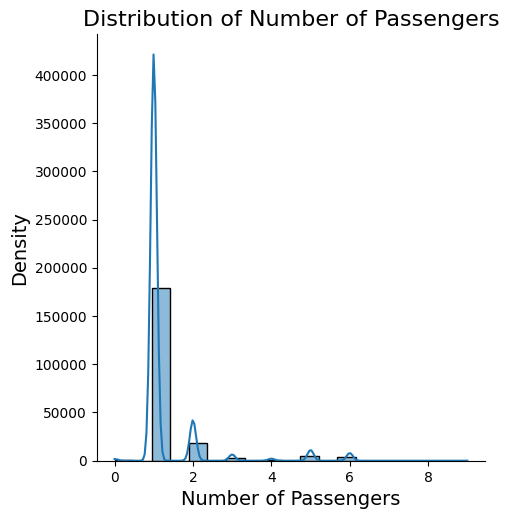

In [54]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a KDE plot
sns.displot(df, x='num_of_passengers', kde=True)

# Add a title and labels
plt.title('Distribution of Number of Passengers', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

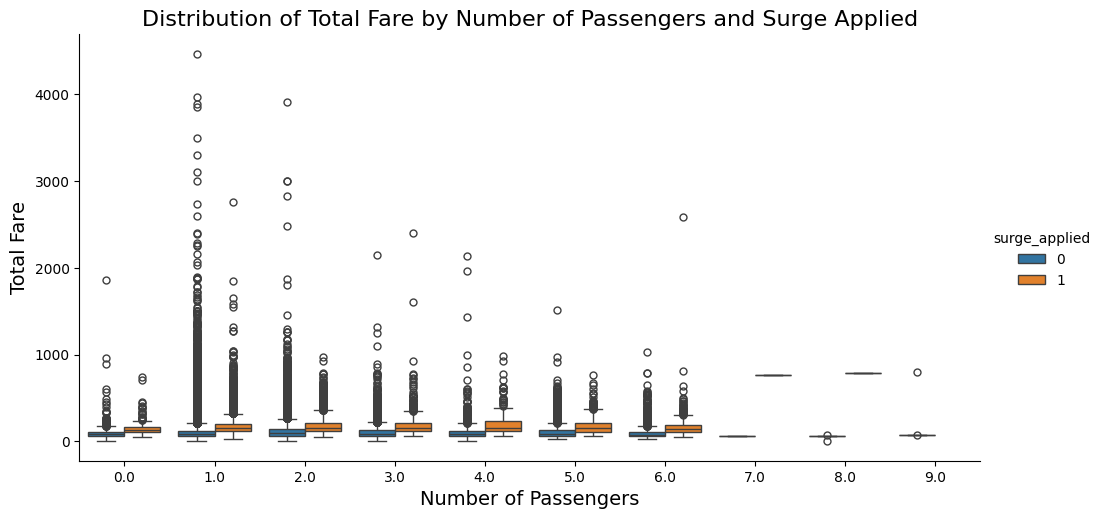

In [55]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.catplot(x='num_of_passengers', y='total_fare', hue='surge_applied', kind='box', data=df, height=5, aspect=2)

# Add a title and labels
plt.title('Distribution of Total Fare by Number of Passengers and Surge Applied', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Total Fare', fontsize=14)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

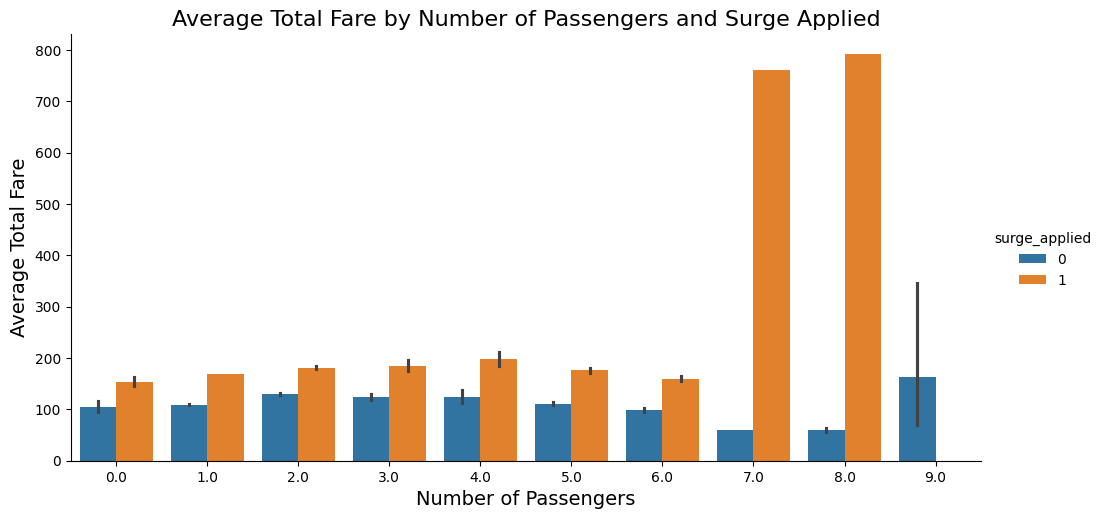

In [56]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.catplot(x='num_of_passengers', y='total_fare', hue='surge_applied', kind='bar', data=df, height=5, aspect=2)

# Add a title and labels
plt.title('Average Total Fare by Number of Passengers and Surge Applied', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Average Total Fare', fontsize=14)

# Show the plot
plt.show()

C:\Users\tay\AppData\Local\Temp\ipykernel_18628\3245563947.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surge_applied', y='total_fare', data=df, palette='viridis')


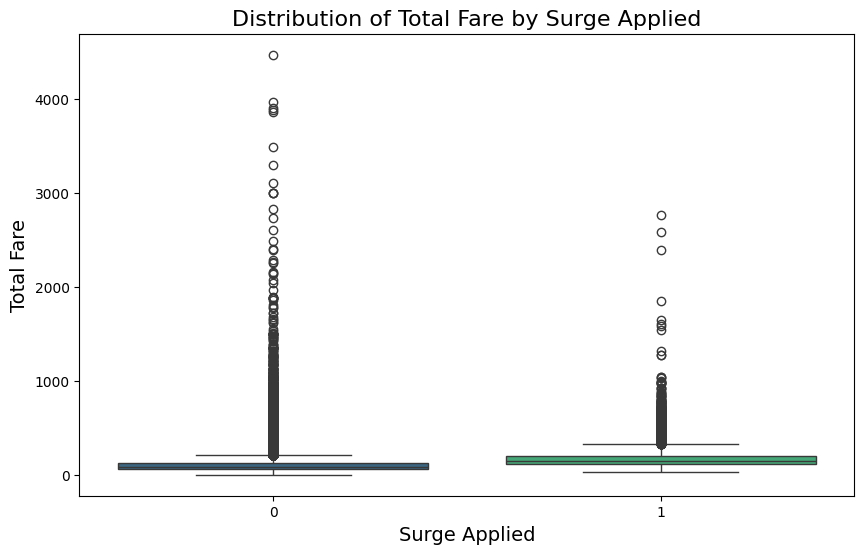

In [57]:
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x='surge_applied', y='total_fare', data=df, palette='viridis')

# Add a title and labels
plt.title('Distribution of Total Fare by Surge Applied', fontsize=16)
plt.xlabel('Surge Applied', fontsize=14)
plt.ylabel('Total Fare', fontsize=14)

# Show the plot
plt.show()

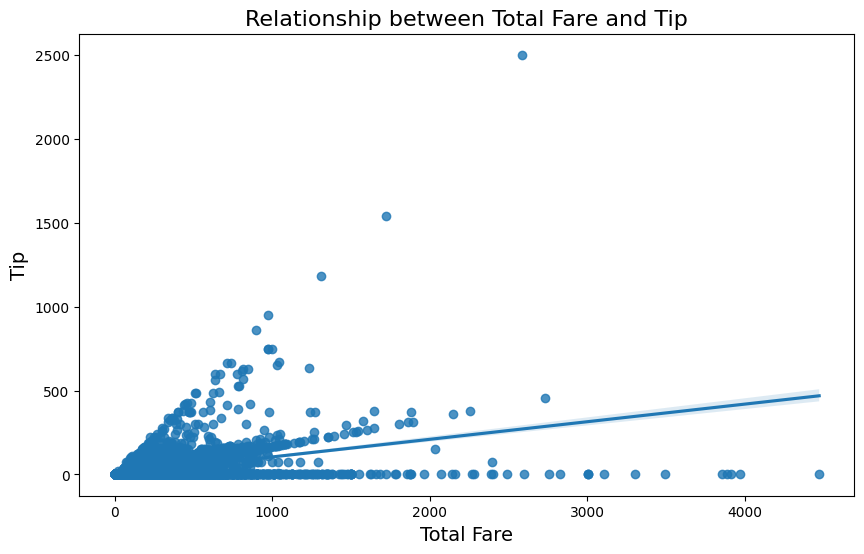

In [58]:
# Create a larger figure
plt.figure(figsize=(10, 6))

# Create a scatter plot with regression line
sns.regplot(x='total_fare', y='tip', data=df)

# Add a title and labels
plt.title('Relationship between Total Fare and Tip', fontsize=16)
plt.xlabel('Total Fare', fontsize=14)
plt.ylabel('Tip', fontsize=14)

# Show the plot
plt.show()

<Axes: >

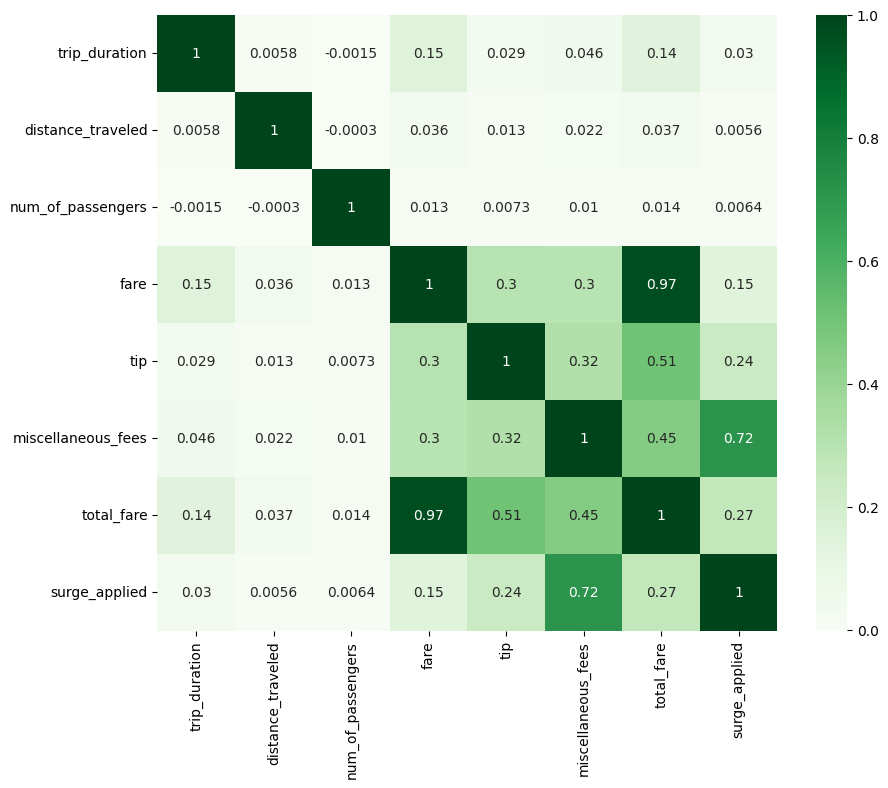

In [59]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap=plt.colormaps['Greens'],annot=True)

In [60]:
class RandomForest:
    def __init__(self, n_trees=100):
        self.n_trees = n_trees
        self.trees = []
    
    def __make_bootstraps(self, data):
        dc = {}
        unip = 0
        b_size = data.shape[0]
        idx = [i for i in range(b_size)]
        for b in range(self.n_trees):
            sidx = np.random.choice(idx, size=b_size, replace=True)
            b_samp = data[sidx,:]
            unip += len(set(sidx))
            oidx = list(set(idx)-set(sidx))
            o_samp = np.array([])
            if oidx:
                o_samp = data[oidx,:] 
            dc['boot_' + str(b)] = {'boot': b_samp, 'test': o_samp}
        return (dc)
    
    def get_params(self, deep=False):
        return {'n_trees': self.n_trees}
    
    @abstractmethod
    def _make_tree_model(self):
        pass

    def _train(self, X_train, y_train):
        # Package the input data
        training_data = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
        # Make bootstrap samples
        dcBoot = self.__make_bootstraps(training_data)
        # Iterate through each bootstrap sample & fit a model
        tree_m = self._make_tree_model()
        dcOob = {}
        for b in dcBoot:
            # Make a clone of the model
            model = clone(tree_m)
            # Fit a decision tree model to the current sample
            model.fit(dcBoot[b]['boot'][:, :-1], dcBoot[b]['boot'][:, -1].reshape(-1, 1))
            # Append the fitted model
            self.trees.append(model)
            # Store the out-of-bag test set for the current bootstrap
            if dcBoot[b]['test'].size:
                dcOob[b] = dcBoot[b]['test']
            else:
                dcOob[b] = np.array([])
        # Return the oob data set
        return dcOob

    # Protected function to predict from the ensemble
    def _predict(self, X):
        # Check if we've fit the ensemble
        if not self.trees:
            print('You must train the ensemble before making predictions!')
            return None
        # Loop through each fitted model
        predictions = []
        for m in self.trees:
            # Make predictions on the input X
            yp = m.predict(X)
            # Append predictions to storage list
            predictions.append(yp.reshape(-1, 1))
        # Compute the ensemble prediction
        ypred = np.mean(np.concatenate(predictions, axis=1), axis=1)
        # Return the prediction
        return ypred
    

In [61]:
class RandomForestClassifierCustom(RandomForest):
    def __init__(self, n_trees=100, max_depth: int = None, min_samples_split: int = 2, criterion: str = 'gini', class_weights='balanced'):
        super().__init__(n_trees)
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.class_weights = class_weights

    # Protected function to obtain the right decision tree
    def _make_tree_model(self):
        return DecisionTreeClassifier(max_depth=self.max_depth,
                                      min_samples_split=self.min_samples_split,
                                      criterion=self.criterion,
                                      class_weight=self.class_weights)

    # Public function to return model parameters
    def get_params(self, deep=False):
        return {'n_trees': self.n_trees,
                'max_depth': self.max_depth,
                'min_samples_split': self.min_samples_split,
                'criterion': self.criterion,
                'class_weights': self.class_weights}

    # Train the ensemble
    def fit(self, X_train, y_train, print_metrics=False):
        # Call the protected training method
        dcOob = self._train(X_train, y_train)
        # If selected, compute the standard errors and print them
        if print_metrics:
            # Initialize metric arrays
            accs = np.array([])
            pres = np.array([])
            recs = np.array([])
            # Loop through each bootstrap sample
            for b, m in zip(dcOob, self.trees):
                # Compute the predictions on the out-of-bag test set & compute metrics
                if dcOob[b].size:
                    yp = m.predict(dcOob[b][:, :-1])
                    acc = accuracy_score(dcOob[b][:, -1], yp)
                    pre = precision_score(dcOob[b][:, -1], yp, average='weighted')
                    rec = recall_score(dcOob[b][:, -1], yp, average='weighted')
                    # Store the error metrics
                    accs = np.concatenate((accs, acc.flatten()))
                    pres = np.concatenate((pres, pre.flatten()))
                    recs = np.concatenate((recs, rec.flatten()))
            # Print standard errors
            print("Standard error in accuracy: %.2f" % np.std(accs))
            print("Standard error in precision: %.2f" % np.std(pres))
            print("Standard error in recall: %.2f" % np.std(recs))

    # Predict from the ensemble
    def predict(self, X):
        # Call the protected prediction method
        ypred = self._predict(X)
        # Convert the results into integer values & return
        return np.round(ypred).astype(int)

Dimensions of df:  (209673, 8)
Classes in the label:  [0 1]


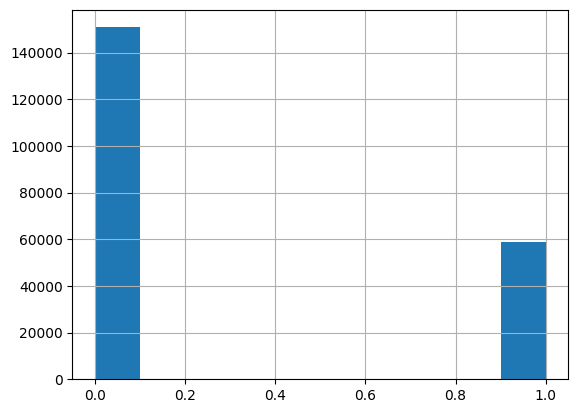

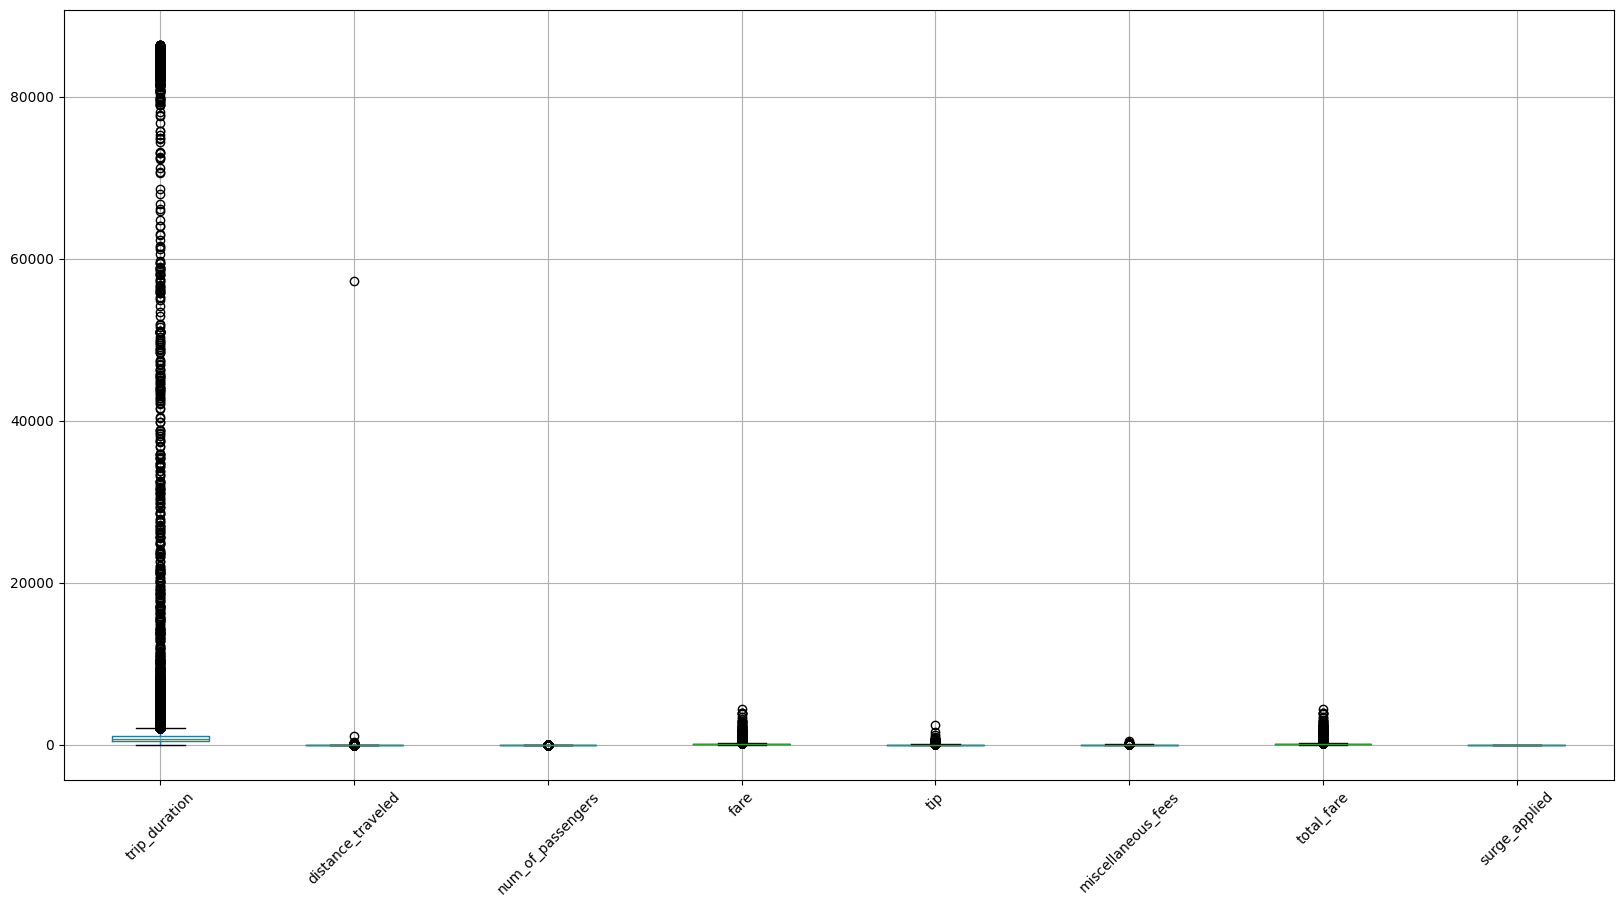

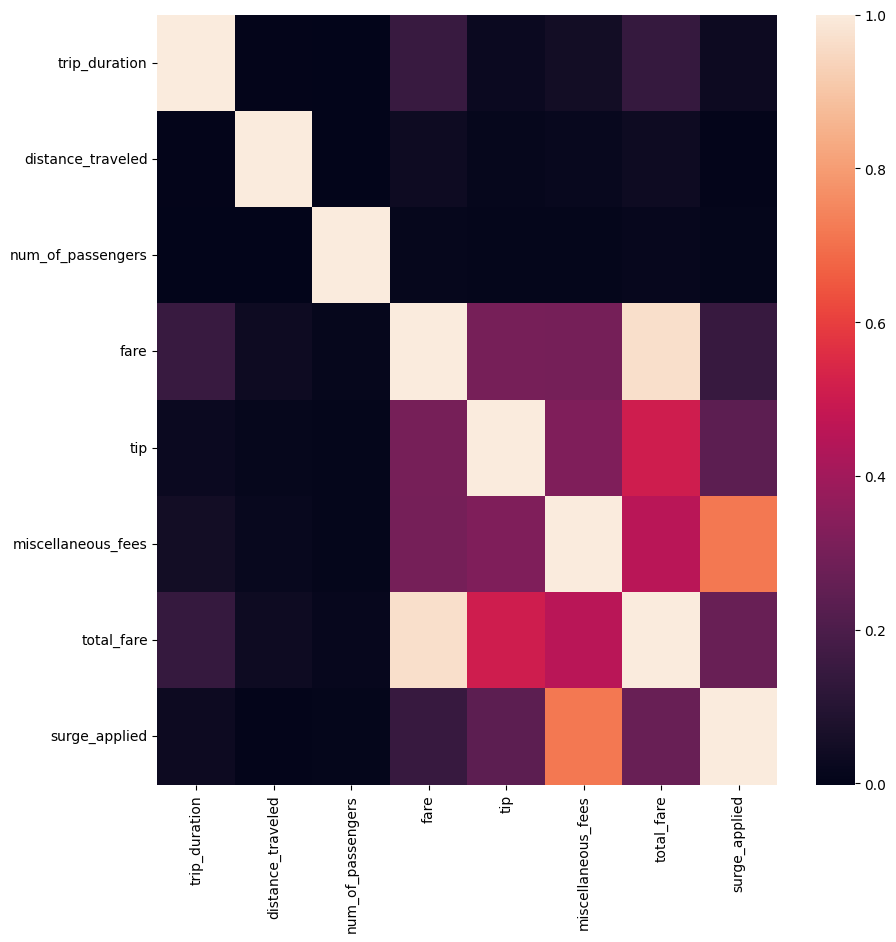

Highly correlated input features:  fare  &  ['total_fare']
Highly correlated input features:  total_fare  &  ['fare']
Mean Squared Error: 42.08


In [62]:
# Check the dimensions of these data
print('Dimensions of df: ', df.shape)

# What unique classes exist in the label variable?
print('Classes in the label: ', df['surge_applied'].unique())

# What is the frequency of the classes in the dataset?
df['surge_applied'].hist()
plt.show()

# View the first 5 rows of input features
df.head(5)

# Make a boxplot to view the distribution in these data
df.boxplot(figsize=(20, 10), rot=45)
plt.show()

# Plot the Pearson correlation for our input features
fig, ax = plt.subplots(figsize=(10, 10))
dfCorr = df.corr()
sns.heatmap(dfCorr)
plt.show()

# Convert all correlations to positive values
dfCorr = dfCorr.abs()

# Loop through rows
for index, sRow in dfCorr.iterrows():
    # Get the valid entries
    sCorrs = sRow[sRow.index != index]
    sCorrs = sCorrs[sCorrs > 0.8]

    # Print out results
    if not sCorrs.empty:
        print('Highly correlated input features: ', index, ' & ', sCorrs.index.values)

# Create a random forest regressor
rfr = RandomForestRegressor()

# Train the regressor & view estimates for prediction error
rfr.fit(df.drop('total_fare', axis=1), df['total_fare'])

# Use k-fold cross-validation to measure performance
mse = make_scorer(mean_squared_error)
scores = cross_val_score(rfr, df.drop('total_fare', axis=1), df['total_fare'], cv=10, scoring=mse)

print('Mean Squared Error: %.2f' % np.mean(scores))